In [1]:
import megatron as me
from scipy.sparse import load_npz

/Users/huidong/anaconda3/envs/env_megatron/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [2]:
me.__version__

'0.1a'

In [3]:
workdir = 'result_larry'
me.settings.set_workdir(workdir)

Saving results in: result_larry


In [4]:
me.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [5]:
adata = me.read_h5ad('rnaseq_weinreb20_invitro.h5ad')
adata

AnnData object with n_obs × n_vars = 130887 × 25289
    obs: 'Time point', 'Population', 'Annotation', 'Well'
    obsm: 'X_SPRING'

In [8]:
mat_clones = load_npz('clones_weinreb20_invitro.npz')
mat_clones

<130887x5864 sparse matrix of type '<class 'numpy.bool_'>'
	with 49302 stored elements in Compressed Sparse Column format>

In [9]:
me.pp.add_clones(adata, 
                 mat=mat_clones)

In [10]:
adata

AnnData object with n_obs × n_vars = 130887 × 25289
    obs: 'Time point', 'Population', 'Annotation', 'Well'
    uns: 'clone'
    obsm: 'X_SPRING', 'X_clone'

In [17]:
me.pp.filter_cells_rna(adata,min_n_genes=100)
me.pp.filter_genes(adata,min_n_cells=5)

before filtering: 
130887 cells,  25289 genes
filter cells based on min_n_genes
after filtering out low-quality cells: 
130887 cells,  25289 genes
Before filtering: 
130887 cells, 25289 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
130887 cells, 19767 genes


In [18]:
me.pp.cal_qc_rna(adata)

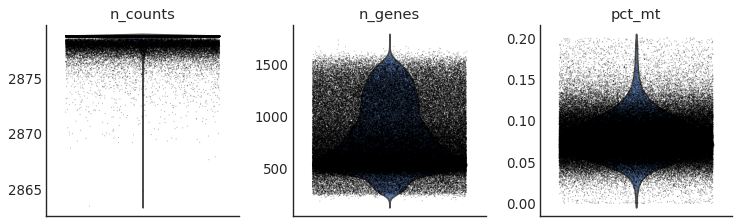

In [19]:
me.pl.violin(adata,list_obs=['n_counts','n_genes','pct_mt'],alpha=0.3)

In [20]:
me.pp.normalize(adata,method='lib_size')
me.pp.log_transform(adata)

In [21]:
me.pp.select_variable_genes(adata)

2000 variable genes are selected.


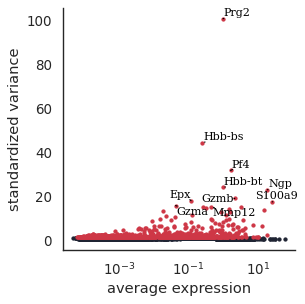

In [22]:
me.pl.variable_genes(adata,show_texts=True)

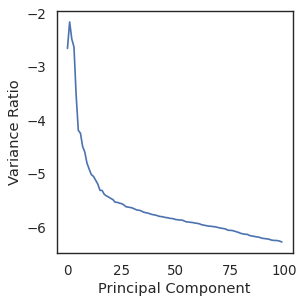

In [23]:
me.pp.pca(adata,feature='highly_variable',n_components=100)
me.pl.pca_variance_ratio(adata,show_cutoff=False)

the number of selected PC is: 50


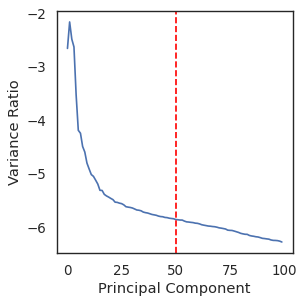

In [24]:
me.pp.select_pcs(adata, n_pcs=50)
me.pl.pca_variance_ratio(adata)

In [25]:
me.tl.umap(adata,obsm='X_pca',n_dim=50)

In [26]:
adata

AnnData object with n_obs × n_vars = 130887 × 19767
    obs: 'Time point', 'Population', 'Annotation', 'Well', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt'
    var: 'n_counts', 'n_cells', 'pct_cells', 'variances_norm', 'variances', 'means', 'highly_variable'
    uns: 'clone', 'pca'
    obsm: 'X_clone', 'X_pca', 'X_umap'
    layers: 'raw'

In [27]:
adata.obs['Time point'] = adata.obs['Time point'].astype(str)

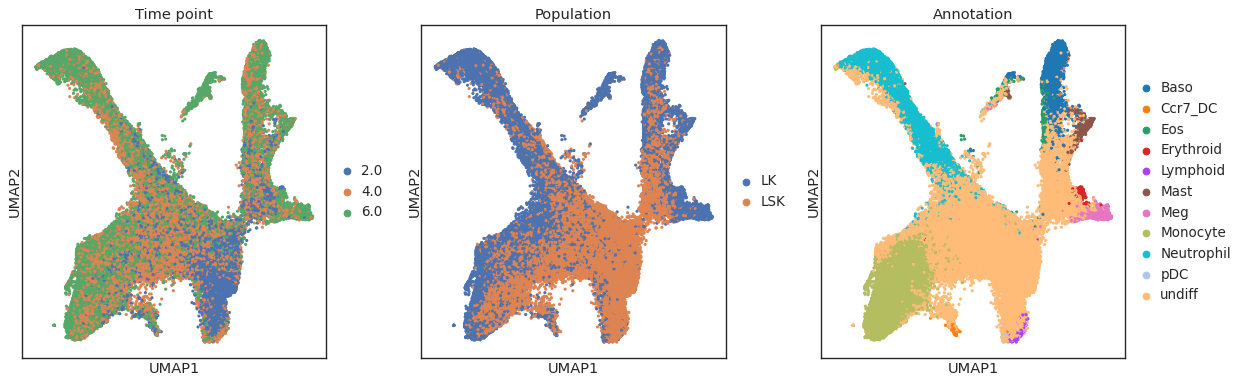

In [28]:
me.pl.umap(adata,color=['Time point','Population','Annotation'],drawing_order='random')

In [29]:
me.pp.filter_clones(adata,min_cells=1)

Before filtering: 5864 clones
After filtering: 5864 clones


In [30]:
adata

AnnData object with n_obs × n_vars = 130887 × 19767
    obs: 'Time point', 'Population', 'Annotation', 'Well', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt'
    var: 'n_counts', 'n_cells', 'pct_cells', 'variances_norm', 'variances', 'means', 'highly_variable'
    uns: 'clone', 'pca', 'color'
    obsm: 'X_clone', 'X_pca', 'X_umap'
    layers: 'raw'

In [ ]:
me.tl.clone_distance(adata,
                     method='directed_graph',
                     obsm='X_umap',
                     layer=None,
                     anno_time='Time point')

Estimated radius is 3.1329248428344725


In [110]:
me.tl.cluster_clones(adata,
                     n_clusters=6,
                     method='hierarchical')

In [111]:
adata.uns['clone']['anno']

,hierarchical
50,6
82,5
105,1
111,6
134,3
...,...
5805,5
5806,3
5818,5
5832,5


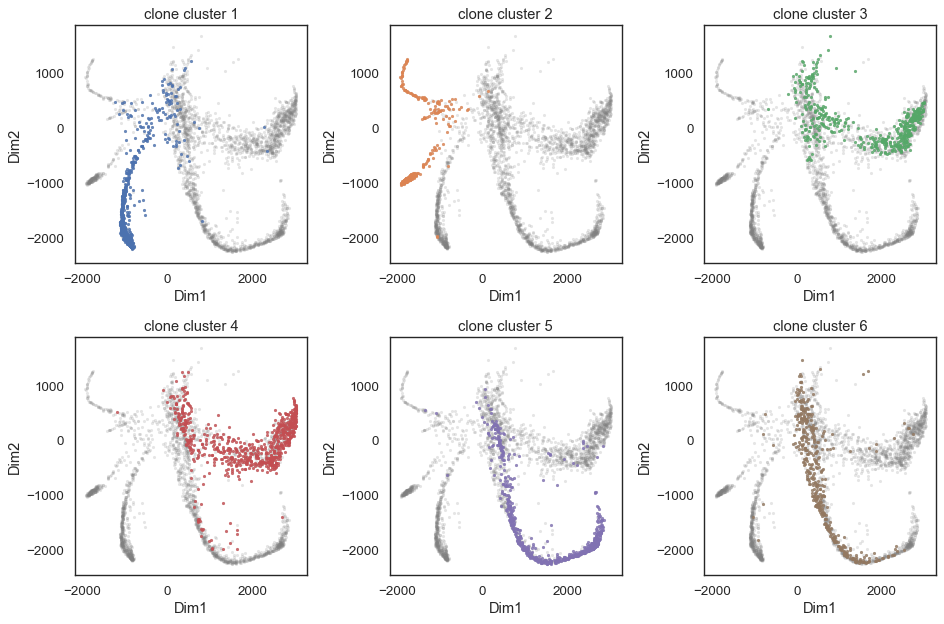

In [117]:
me.pl.clone_scatter(adata, group='hierarchical', obsm='X_umap_paper',show_contour=False, 
                    levels=6, thresh=0.1)

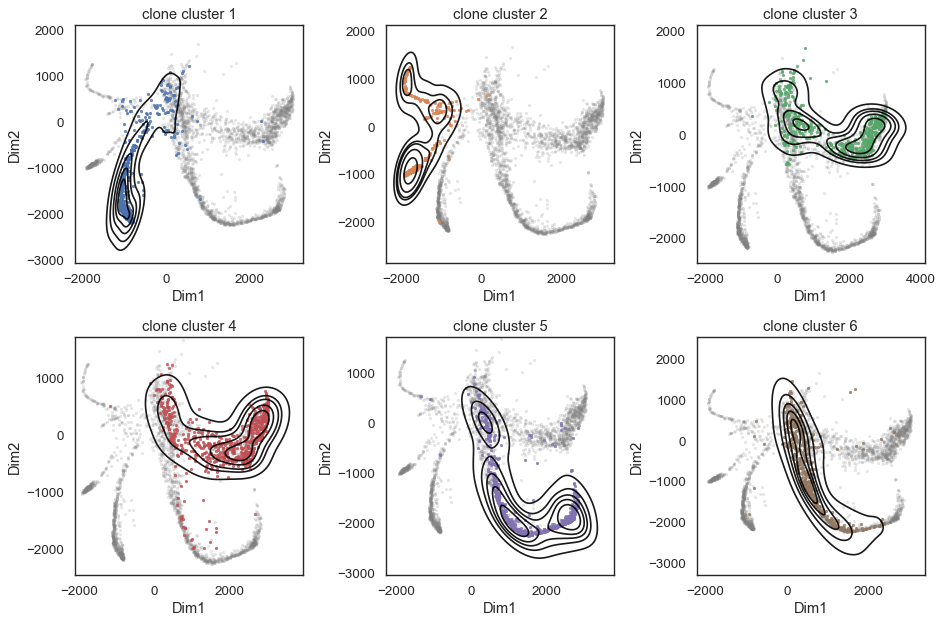

In [118]:
me.pl.clone_scatter(adata, group='hierarchical', obsm='X_umap_paper',show_contour=True, 
                    levels=6, thresh=0.1)

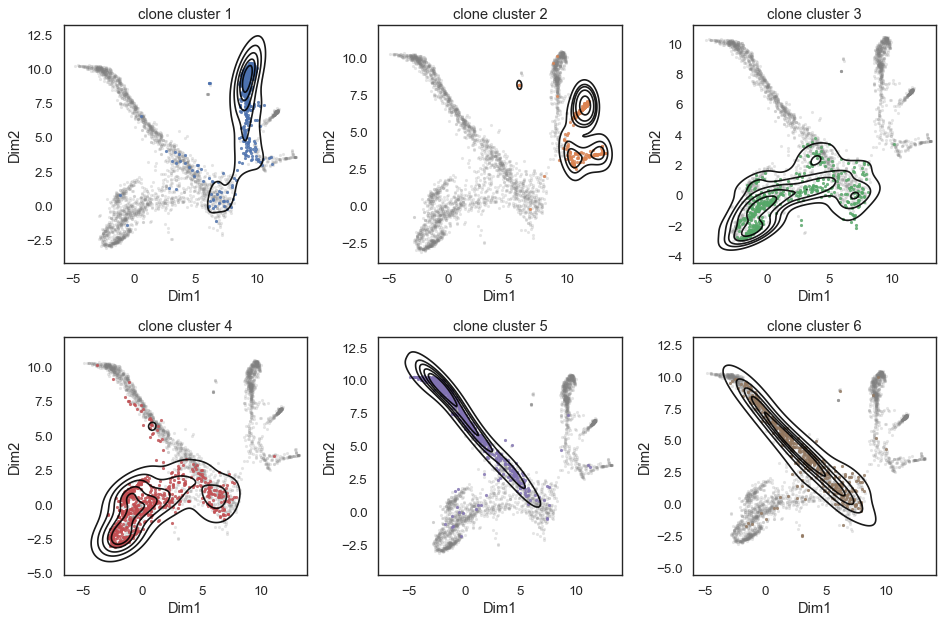

In [119]:
me.pl.clone_scatter(adata, group='hierarchical', obsm='X_umap',show_contour=True, 
                    levels=6, thresh=0.1)